In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
# read results
mf_rbf_gpr_input = pd.read_csv("../exp_mf_rbf_gpr_input.csv", index_col=0)
mf_rbf_gpr_output = pd.read_csv("../exp_mf_rbf_gpr_output.csv", index_col=0)
# merge results
mf_rbf_gpr_results = pd.merge(
    mf_rbf_gpr_input, mf_rbf_gpr_output, left_index=True, right_index=True
)
# remove results of"Forrestor_1b" and "Forrestor_1c" and "Forrestor_1a"
mf_rbf_gpr_results = mf_rbf_gpr_results[mf_rbf_gpr_results["problem"]
                                        != "Forrester_1a"]
mf_rbf_gpr_results = mf_rbf_gpr_results[mf_rbf_gpr_results["problem"]
                                        != "Forrester_1b"]
mf_rbf_gpr_results = mf_rbf_gpr_results[mf_rbf_gpr_results["problem"]
                                        != "Forrester_1c"]
# remove results of "mf_booth"
mf_rbf_gpr_results = mf_rbf_gpr_results[mf_rbf_gpr_results["problem"] != "mf_Booth"]
# remove results of "mf_Himmelblau"
mf_rbf_gpr_results = mf_rbf_gpr_results[
    mf_rbf_gpr_results["problem"] != "mf_Himmelblau"
]


# add one more column which is the relative error between the learned noise level and the true noise level
mf_rbf_gpr_results["noise_error"] = (
    np.abs(mf_rbf_gpr_results["noise_std"] -
           mf_rbf_gpr_results["learned_noise_std"])
    / mf_rbf_gpr_results["noise_std"]
)
mf_rbf_gpr_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Borehole', 'mf_CurrinExp', 'mf_Hartman3',
       'mf_Hartman6', 'mf_Park91A', 'mf_Park91B', 'mf_Sixhump'],
      dtype=object)

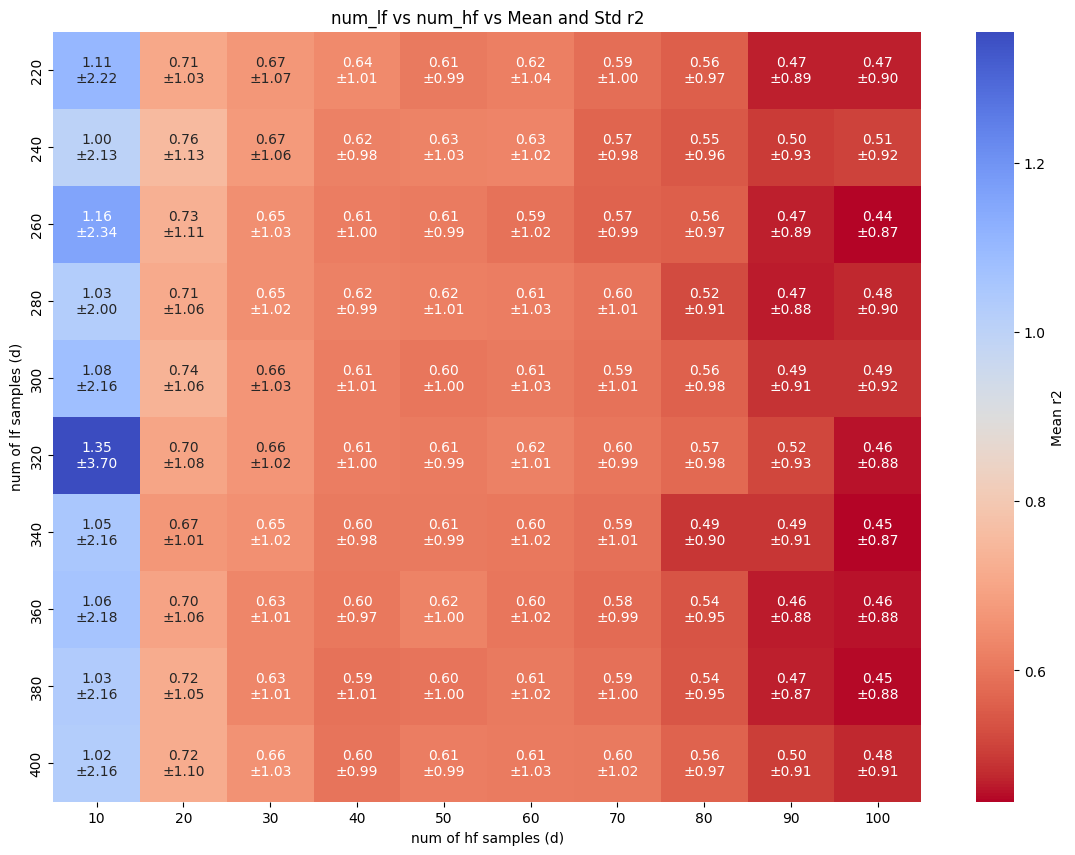

In [40]:
pivot_table = mf_rbf_gpr_results.pivot_table(
    values="noise_error", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

In [41]:
# load results of GPR
gpr_input = pd.read_csv("../../sf_noise_scarce/exp_gpr_input.csv", index_col=0)
gpr_output = pd.read_csv("../../sf_noise_scarce/exp_gpr_output.csv", index_col=0)
# merge results
gpr_results = pd.merge(gpr_input, gpr_output, left_index=True, right_index=True)
# remove results of"Forrestor_1b" and "Forrestor_1c" and "Forrestor_1a"
gpr_results = gpr_results[gpr_results["problem"] != "Forrester_1a"]
# remove results of "mf_booth"
gpr_results = gpr_results[gpr_results["problem"] != "mf_Booth"]
# remove results of "mf_Himmelblau"
gpr_results = gpr_results[gpr_results["problem"] != "mf_Himmelblau"]

# add one more column which is the relative error between the learned noise level and the true noise level
gpr_results["noise_error"] = (
    np.abs(gpr_results["noise_std"] - gpr_results["learned_noise_std"])
    / gpr_results["noise_std"]
)

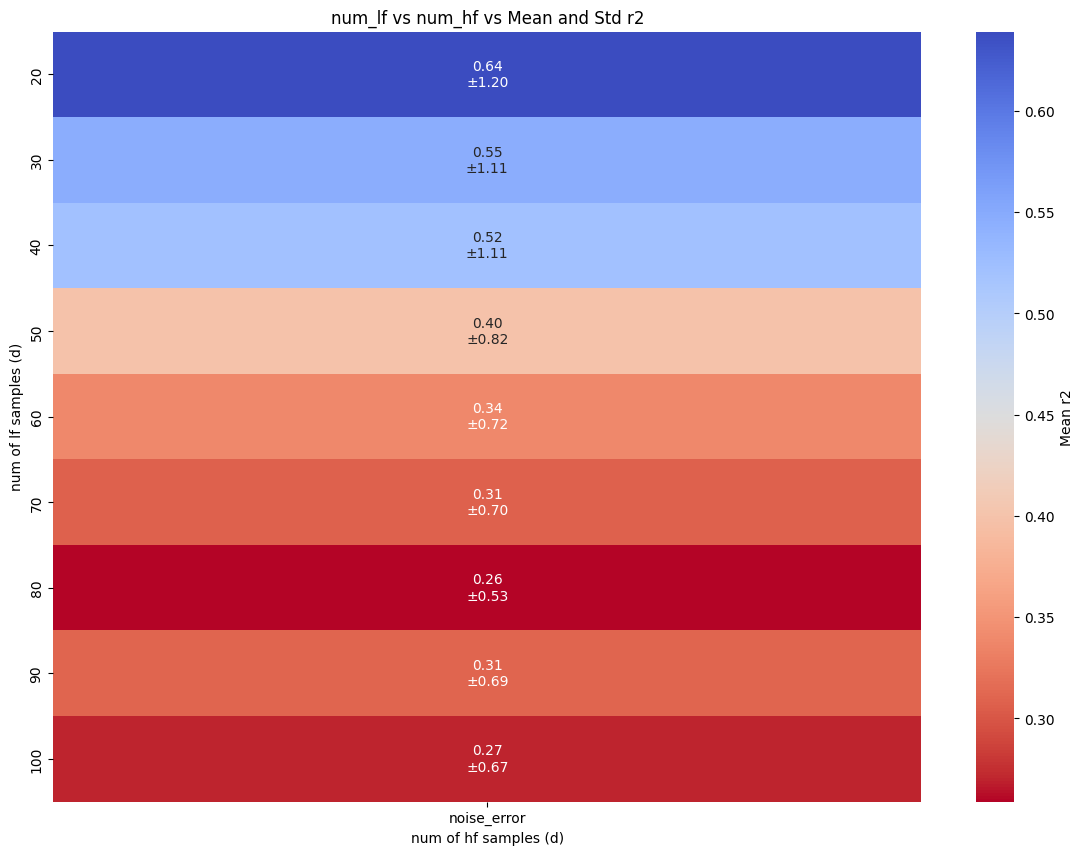

In [42]:
#
pivot_table = gpr_results.pivot_table(
    values="noise_error", index="num_sample", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

In [43]:
# get the results of mf_rbf_gpr with 50 hf samples and 300 lf samples
mf_rbf_gpr_results_300 = mf_rbf_gpr_results[mf_rbf_gpr_results["num_lf"] == 400]
mf_rbf_gpr_results_300

,noise_std,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,log_likelihood,learned_noise_std,cpu_time,noise_error
4770,0.1,10,400,mf_Bohachevsky,1,finished,0.153739,0.029476,0.997934,-8008.449943,0.252065,1.715041,1.520650
4771,0.3,10,400,mf_Bohachevsky,1,finished,0.098403,0.030241,0.997826,-15881.098577,0.197492,1.702806,0.341694
4772,0.5,10,400,mf_Bohachevsky,1,finished,0.284944,0.036823,0.996776,-4220.279787,0.570641,1.926801,0.141282
4773,0.1,20,400,mf_Bohachevsky,1,finished,0.113548,0.023243,0.998716,-2397.476367,0.387079,1.973462,2.870792
4774,0.3,20,400,mf_Bohachevsky,1,finished,0.122547,0.022452,0.998801,-2335.943404,0.445898,1.827568,0.486327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,0.3,90,400,mf_Sixhump,5,finished,0.268564,0.048235,0.998773,-1555.930677,0.524244,5.934849,0.747479
19496,0.5,90,400,mf_Sixhump,5,finished,0.356875,0.055888,0.998353,-2178.032296,0.686092,5.659347,0.372184
19497,0.1,100,400,mf_Sixhump,5,finished,0.485069,0.042277,0.999057,-4974.465725,0.139936,6.345705,0.399362
19498,0.3,100,400,mf_Sixhump,5,finished,0.230266,0.048247,0.998772,-1581.910637,0.486216,6.182344,0.620720


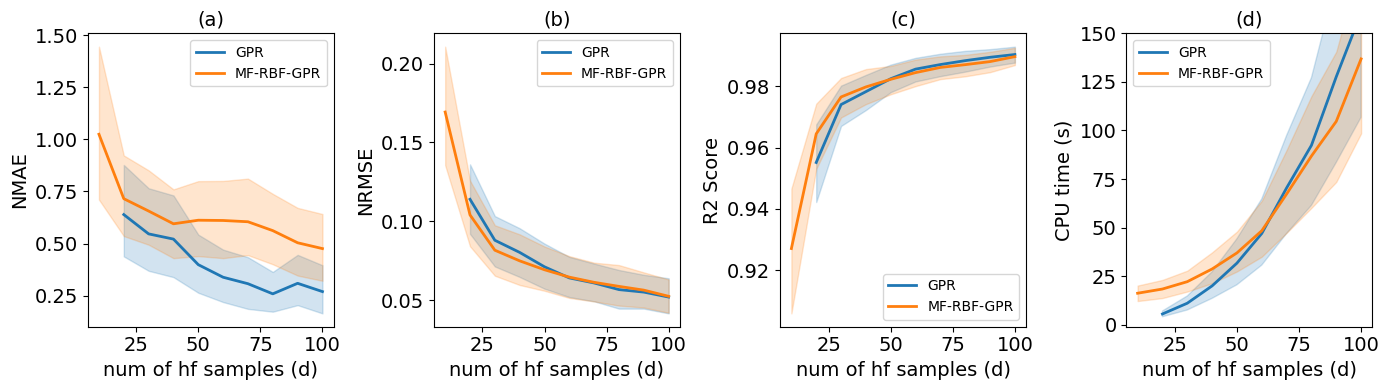

In [47]:
# Create subplots for each metric
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Plotting mae
sns.lineplot(
    data=gpr_results,
    x="num_sample",
    y="noise_error",
    label="GPR",
    linewidth=2,
    ax=axes[0],
)
sns.lineplot(
    data=mf_rbf_gpr_results_300,
    x="num_hf",
    y="noise_error",
    label="MF-RBF-GPR",
    linewidth=2,
    ax=axes[0],
)
# axes[0].set_xlim([1, 20])
axes[0].set_title("(a)", fontsize=14)
axes[0].set_xlabel("num of hf samples (d)", fontsize=14)
axes[0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
sns.lineplot(
    data=gpr_results,
    x="num_sample",
    y="normalized_rmse",
    label="GPR",
    linewidth=2,
    ax=axes[1],
)
sns.lineplot(
    data=mf_rbf_gpr_results_300,
    x="num_hf",
    y="normalized_rmse",
    label="MF-RBF-GPR",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_title("(b)", fontsize=14)
axes[1].set_xlabel(r"num of hf samples (d)", fontsize=14)
axes[1].set_ylabel("NRMSE", fontsize=14)
# axes[1].set_xlim([1, 20])

# Plotting r2
sns.lineplot(
    data=gpr_results,
    x="num_sample",
    linewidth=2,
    y="r2",
    label="GPR",
    ax=axes[2],
)
sns.lineplot(
    data=mf_rbf_gpr_results_300,
    x="num_hf",
    y="r2",
    linewidth=2,
    label="MF-RBF-GPR",
    ax=axes[2],
)
axes[2].set_title("(c)", fontsize=14)
axes[2].set_xlabel("num of hf samples (d)", fontsize=14)
axes[2].set_ylabel("R2 Score", fontsize=14)
axes[2].legend(loc="lower right")
# axes[2].set_xlim([1, 20])
# Plotting cpu time
sns.lineplot(
    data=gpr_results,
    x="num_sample",
    linewidth=2,
    y="cpu_time",
    label="GPR",
    ax=axes[3],
)
sns.lineplot(
    data=mf_rbf_gpr_results_300,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="MF-RBF-GPR",
    ax=axes[3],
)
axes[3].set_ylim([-1, 150])
axes[3].set_title("(d)", fontsize=14)
axes[3].set_xlabel("num of hf samples (d)", fontsize=14)
axes[3].set_ylabel("CPU time (s)", fontsize=14)
# axes[3].set_xlim([1, 20])
# set font size
font_size = 14
axes[0].tick_params(labelsize=font_size)
axes[1].tick_params(labelsize=font_size)
axes[2].tick_params(labelsize=font_size)
axes[3].tick_params(labelsize=font_size)

# Adjust layout
plt.tight_layout()
# plt.savefig("comparison_at_100lf_samples.png", dpi=300)
# plt.savefig("comparison_at_100lf_samples.pdf", dpi=300)
# plt.savefig("comparison_at_100lf_samples.svg", dpi=300)

plt.show()

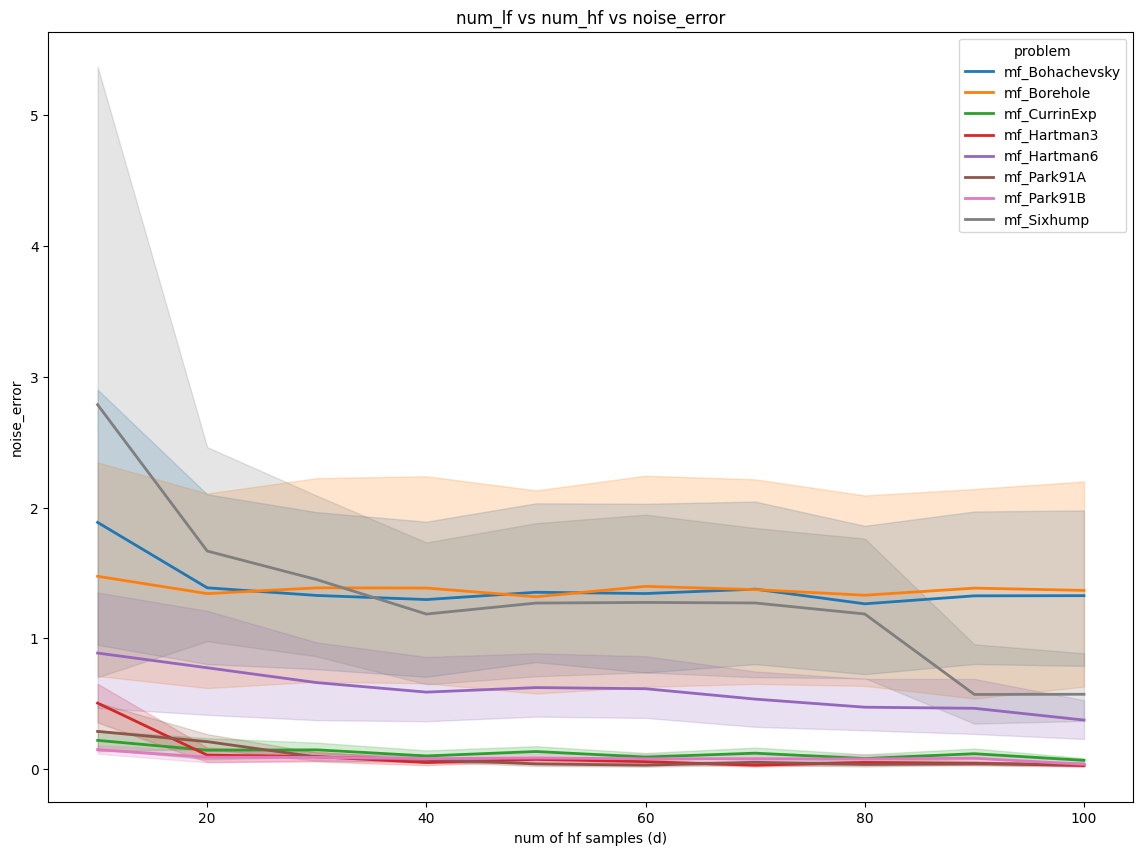

In [45]:
# plot mf_rbf_gpr_results_300 by using noise_error as the metric and num_hf as the x-axis
plt.figure(figsize=(14, 10))
sns.lineplot(
    data=mf_rbf_gpr_results_300,
    x="num_hf",
    y="noise_error",
    hue="problem",
    linewidth=2,
    # label="MF-RBF-GPR",
)
plt.title("num_lf vs num_hf vs noise_error")
plt.xlabel("num of hf samples (d)")
plt.ylabel("noise_error")
plt.show()